In [1]:
import pandas as pd
df = pd.read_csv("AmesHousing.csv")

In [2]:

print(df.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

Afficher un aperçu de lecture du dataset

In [3]:

df = df.drop(columns=['Order', 'PID'])

In [4]:

print(df.head())

   MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave   NaN       IR1   
1           20        RH          80.0     11622   Pave   NaN       Reg   
2           20        RL          81.0     14267   Pave   NaN       IR1   
3           20        RL          93.0     11160   Pave   NaN       Reg   
4           60        RL          74.0     13830   Pave   NaN       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0     NaN    NaN   
1          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
2          Lvl    AllPub     Corner  ...         0     NaN    NaN   
3          Lvl    AllPub     Corner  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0          NaN        0       5     2010        WD   

In [5]:

nan_percent = df.isnull().mean() * 100
print("Percentage of NaN per column :")
print(nan_percent[nan_percent > 0].sort_values(ascending=False))

Percentage of NaN per column :
Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Garage Cars        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Garage Area        0.034130
Electrical         0.034130
dtype: float64


In [6]:

df = df.drop(columns=nan_percent[nan_percent > 40].index)

In [7]:

for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col] = df[col].fillna(df[col].mean())

In [8]:

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  


In [9]:
print("is there any NaN left ? :", df.isnull().sum().sum())
print(df.head())

is there any NaN left ? : 0
   MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           20        RL         141.0     31770   Pave       IR1   
1           20        RH          80.0     11622   Pave       Reg   
2           20        RL          81.0     14267   Pave       IR1   
3           20        RL          93.0     11160   Pave       Reg   
4           60        RL          74.0     13830   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope  ... Enclosed Porch 3Ssn Porch  \
0          Lvl    AllPub     Corner        Gtl  ...              0          0   
1          Lvl    AllPub     Inside        Gtl  ...              0          0   
2          Lvl    AllPub     Corner        Gtl  ...              0          0   
3          Lvl    AllPub     Corner        Gtl  ...              0          0   
4          Lvl    AllPub     Inside        Gtl  ...              0          0   

  Screen Porch Pool Area Misc Val  Mo Sold  Yr Sold  Sale Type  \
0   

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [11]:
print("Dimensions after encoding:", df_encoded.shape)
print(df_encoded.head())


Dimensions after encoding: (2930, 247)
   MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0           20         141.0     31770             6             5   
1           20          80.0     11622             5             6   
2           20          81.0     14267             6             6   
3           20          93.0     11160             7             5   
4           60          74.0     13830             5             5   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  ...  \
0        1960            1960         112.0         639.0           0.0  ...   
1        1961            1961           0.0         468.0         144.0  ...   
2        1958            1958         108.0         923.0           0.0  ...   
3        1968            1968           0.0        1065.0           0.0  ...   
4        1997            1998           0.0         791.0           0.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = df_encoded.drop(columns=['SalePrice'])  
y = df_encoded['SalePrice']                 

In [16]:
scaler = StandardScaler()


In [17]:
X_scaled = scaler.fit_transform(X)


In [18]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
print("Overview of standardized variables:")
print(X_scaled.head())


Overview of standardized variables:
   MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0    -0.877005      3.366911  2.744381     -0.067254     -0.506718   
1    -0.877005      0.505463  0.187097     -0.776079      0.393091   
2    -0.877005      0.552372  0.522814     -0.067254      0.393091   
3    -0.877005      1.115280  0.128458      0.641571     -0.506718   
4     0.061285      0.224010  0.467348     -0.776079     -0.506718   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  ...  \
0   -0.375537       -1.163488      0.056639      0.431171     -0.294023  ...   
1   -0.342468       -1.115542     -0.571242      0.055706      0.557490  ...   
2   -0.441674       -1.259380      0.034215      1.054750     -0.294023  ...   
3   -0.110988       -0.779919     -0.571242      1.366540     -0.294023  ...   
4    0.848000        0.658466     -0.571242      0.764917     -0.294023  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VW

In [20]:
import numpy as np

def soft_thresholding(z, lmbd):
    if z > lmbd:
        return z - lmbd
    elif z < -lmbd:
        return z + lmbd
    else:
        return 0.0

def lasso_coordinate_descent(X, y, lmbd, max_iter=1000, tol=1e-6):
    n, p = X.shape
    theta = np.zeros(p)
    X_norms = np.sum(X ** 2, axis=0)

    for iteration in range(max_iter):
        theta_old = theta.copy()

        for j in range(p):
            
            r_j = y - X @ theta + theta[j] * X[:, j]
            rho = np.dot(X[:, j], r_j)

            
            theta[j] = soft_thresholding(rho / X_norms[j], lmbd / X_norms[j])

       
        if np.linalg.norm(theta - theta_old, ord=np.inf) < tol:
            print("Convergence reached at iteration", iteration + 1)
            return theta

    print("End of iterations (not yet converged)")
    return theta


In [21]:
lambda_val = 0.1
theta_hat = lasso_coordinate_descent(X_scaled.values, y.values, lmbd=lambda_val)


End of iterations (not yet converged)


In [22]:
print("Estimated Lasso Coefficients :")
print(pd.Series(theta_hat, index=X_scaled.columns))


Estimated Lasso Coefficients :
MS SubClass              -2862.171132
Lot Frontage               855.083205
Lot Area                  4615.474884
Overall Qual              9791.040266
Overall Cond              6307.609263
                             ...     
Sale Condition_AdjLand    1313.021441
Sale Condition_Alloca      799.099765
Sale Condition_Family      164.321862
Sale Condition_Normal     2663.572510
Sale Condition_Partial    1598.195754
Length: 246, dtype: float64


In [25]:
coeffs = pd.Series(theta_hat, index=X_scaled.columns)
coeffs_nonzero = coeffs[coeffs != 0]
print("Most infuential variables :")
print(coeffs_nonzero.sort_values(key=abs, ascending=False).head(15))


Most infuential variables :
Roof Matl_CompShg    72996.269868
Roof Matl_Tar&Grv    54861.340604
Roof Matl_WdShake    33625.632114
Roof Matl_WdShngl    32519.333448
2nd Flr SF           23252.847650
Garage Qual_TA      -16278.920899
1st Flr SF           15208.513540
Garage Qual_Fa      -14719.472203
Exter Qual_TA       -12680.414102
Roof Matl_Membran    12500.012296
Roof Matl_Metal      12297.229152
BsmtFin SF 1         12132.191628
Kitchen Qual_TA     -11689.747750
Exter Qual_Gd       -11590.019571
Roof Matl_Roll       11202.892024
dtype: float64


In [26]:
top_coeffs = coeffs[coeffs != 0].reindex(coeffs.abs().sort_values(ascending=False).index).head(15)

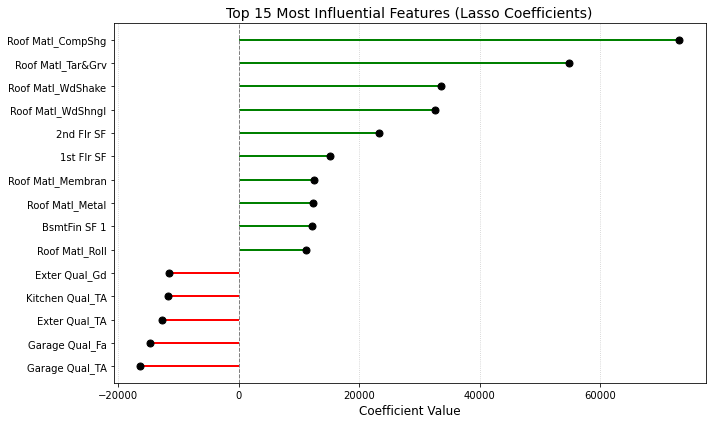

In [ ]:
import matplotlib.pyplot as plt

top_15_idx = coeffs[coeffs != 0].abs().sort_values(ascending=False).head(15).index
top_15_real = coeffs.loc[top_15_idx]
top_15_real = top_15_real.sort_values()  


plt.figure(figsize=(10, 6))
plt.hlines(y=top_15_real.index, xmin=0, xmax=top_15_real.values, 
           color=np.where(top_15_real.values > 0, 'green', 'red'), linewidth=2)
plt.plot(top_15_real.values, top_15_real.index, 'o', 
         color='black', markersize=7)

plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.title("Top 15 Most Influential Features (Lasso Coefficients)", fontsize=14)
plt.xlabel("Coefficient Value", fontsize=12)
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()